## Latent Dirichlet allocation
In natural language processing, latent Dirichlet allocation (LDA) is a Bayesian network (and, therefore, a generative statistical model) for modeling automatically extracted topics in textual corpora. 

* Τα δεδομένα προέρχονται απο το twitter
* Αφόρα tweet που έχουν γίνει για το κρασί
* Η αναλυση LDA θα γινει με εργαλεια του gensim

In [1]:
#klasi me tin opoia tha ginete i epergasia ton dedomenon 
#tha metatrpei ta string se vector
from collections import defaultdict
import re
from wordcloud import WordCloud
from gensim import corpora
from nltk.corpus import stopwords
import numpy as np

class s2v:
    def __init__(self,docs=[]):
        

        #remove stoplist
       
        self.stoplist =['και','κι','να','το','τα','του','τους','τη','της','την','των','τον','με','τι','τις','τη','ο',
        'στον','στο','στην','στη','στα','οι','ας','μου','μας','σου','σε','σαν','σας','απο','από',
        'οτι','ότι','ὴ','η','ή','που','πως','οπως','ὸπως','πιο','ποιος','αυτο','αυτὸ','αυτος','αυτη','αυτα',
        'για','θα','ὰλλο','αλλο','αλλά','άλλα','αλλα','ρε','ὸτι','οτι','έχω','εχω','κ','αν'] 
        self.docs=docs
        self.dictionary = corpora.Dictionary([[]])
        self.replace=[]
        self.frequency = defaultdict(int)
        
    def clean_doc(self,doc):
        #stoplist =stopwords.words('english')+stopwords.words('greek')
        stoplist=self.stoplist # set('for a of the and to in is as i'.split(' '))
        # Lowercase each document, split it by white space and filter out stopwords
        #texts = [[word for word in document.lower().split() if word not in stoplist]
        #         for document in text_corpus]

        
        doc_=doc
        doc_=doc_.lower()
        for org,neo in self.replace:
            doc_=re.sub(org, neo, doc_)
        
        doc_=re.sub('[,\.!?&+-;#-]', ' ', doc_)
        #text_corpus_=text_corpus_.map(lambda x: re.sub('[,\.!?]', ' ', x))
        #metatropi olon ton gramatvn se peza
        
        #doc_=re.sub('κρασι', 'κρασί', doc_)
        
        #t_corpus_=text_corpus_.map(lambda x: x.lower())
        #renove stoplist
        doc_=' '.join([word for word in str(doc_).split(" ") if word not in stoplist])
        return doc_
    
    def repl(self,org,neo):
        self.replace+=[(org,neo)]
    
    def frec_doc(self,doc):
        for token in doc.split():
                self.frequency[token] += 1
        
    def doc2V(self,doc):
        
        #processed_corpus_=text_corpus_.map(lambda x:' '.join([word for word in x.split() if frequency[word]>1]))
        #doc_=' '.join([word for word in doc.split() if self.frequency[word]>1])
        
        #processed_corpus=processed_corpus_.map(lambda x:x.split())
        doc2list=doc.split()
        #self.processed_corpus=processed_corpus
        self.dictionary.add_documents([doc2list])
        #self.bow_corpus=processed_corpus.map(lambda x: self.dictionary.doc2bow(x)).values.tolist()
        vector=self.dictionary.doc2bow(doc2list)
        return vector
        
    def process(self):
        docs=self.docs
        docs_vector=[]
        for doc in docs:
            doc_clean=self.clean_doc(doc)
            self.frec_doc(doc_clean)
            docs_vector+=[self.doc2V(doc_clean)]
        self.docs_vector=docs_vector
            
    def wordcloud(self):
        # Join the different processed titles together.
        #long_string = ','.join(self.processed_corpus.map(lambda x:' '.join(x)).values.tolist())

        # Create a WordCloud object
        wordcloud_ = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

        # Generate a word cloud
        wordcloud_.generate_from_frequencies(self.frequency)

        # Visualize the word cloud
        return wordcloud_.to_image()

In [2]:
import json

with open('stopwords-el.json', 'r') as f:
    stopword_gr = json.load(f)
print(len(stopword_gr))
test=s2v()

for w in [w for w in test.stoplist if w not in stopword_gr]:
    stopword_gr.append(w)
print(len(stopword_gr))


847
858


In [3]:
import pandas as pd

df=pd.read_csv("κρασί.csv")
df.isnull().sum()#elenxos gia kenes eggrafes

Unnamed: 0    0
Datetime      0
Tweet Id      0
Text          0
Username      0
dtype: int64

In [4]:
df['Text']
s=str(df.iloc[1]['Text']) 
print(s)
re.sub('πολύ|καλά','',s)

@GatoulosCK @GreekAnalyst Έχετε πολύ καλά κρασί.


'@GatoulosCK @GreekAnalyst Έχετε   κρασί.'

H στηλη που μας ενδιαφερει ειναι η Text . Αυτη περιεχει τις κριτικές...

## καθαρισμος δεδομενων

In [5]:
text_corpus=df["Text"]
text_corpus=text_corpus#[:100]
text_corpus
tc=s2v(text_corpus.values)
#tc.docs_vector
tc.stoplist=stopword_gr
tc.repl('κρασι','κρασί')
tc.repl('καλα|καλά|καλη|καλή|καλο','καλό')

tc.repl('http[^ ]*','_url_')
tc.repl('@[\w|_]+ ','') # afairesi otnomaton px @bold_tr
tc.process()
#print(tc.dictionary.token2id)


In [6]:
print(f'μεγεθος dictionary:{len(tc.dictionary)}')
print(tc.docs_vector[1])

μεγεθος dictionary:53324
[(2, 1), (3, 1), (4, 1), (5, 1)]


Οι πιο συχνές λέξης

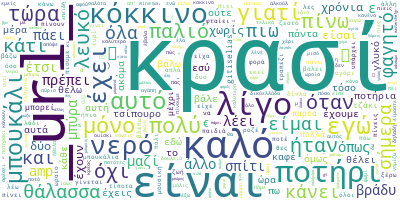

In [7]:
tc.wordcloud()

model

In [8]:
from gensim.models import LdaModel
num_topics=5
chunksize=800 #poses eggrafes tha epeksergazete kathe fora
passes=20 # oti kai to epoch
iterations=400
eval_every=None
temp=tc.dictionary[0]
id2word=tc.dictionary.id2token

model=LdaModel(corpus=tc.docs_vector,
              id2word=id2word,
              chunksize=chunksize,
              alpha='auto',
              eta='auto',
              iterations=iterations,
              num_topics=num_topics,
              passes=passes,
              eval_every=eval_every
              )


προετιμασια model για να μας δειχνει τις πιο οικιες εγγραφες με αυτες που παραθετουμε

In [10]:
import pyLDAvis.gensim_models as gensimvis
import pickle 
import pyLDAvis
import os
# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 0:
    LDAvis_prepared = gensimvis.prepare(model, tc.docs_vector,tc.dictionary)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')

LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.373491  0.001810       1        1  55.573819
4     -0.096560  0.255843       2        1  14.682888
3     -0.096061 -0.101722       3        1  10.952025
2     -0.092421 -0.116994       4        1  10.897894
0     -0.088449 -0.038937       5        1   7.893374, topic_info=             Term          Freq         Total Category  logprob  loglift
2           κρασί  23523.000000  23523.000000  Default  30.0000  30.0000
24          _url_   6149.000000   6149.000000  Default  29.0000  29.0000
371          λίγο   1290.000000   1290.000000  Default  28.0000  28.0000
181         είναι   3374.000000   3374.000000  Default  27.0000  27.0000
4            καλό   2535.000000   2535.000000  Default  26.0000  26.0000
...           ...           ...           ...      ...      ...      ...
503       ιστορία     48.139502     48.861235   Topic5  -6.0951   2.5243
348     παρασκευή     46.639078     47.367640   Topic5  -6.1267   2.5236
1306   εξαιρετικό     46.358290     47.083346   Topic5  -6.1328   2.5236
10090      greece     43.403012     44.116319   Topic5  -6.1986   2.5228
4537      σάββατο     41.893045     42.623558   Topic5  -6.2341   2.5219

[186 rows x 6 columns], token_table=       Topic      Freq            Term
term                                  
539        2  0.998269               "
515        2  0.989675               %
24         1  0.999888           _url_
19804      4  0.993740  agriesmelisses
516        2  0.881134             amp
...      ...       ...             ...
178        1  0.998515               🍷
635        3  0.987451               😁
1267       1  0.998136               😂
2083       4  0.991882               😜
934        4  0.996229               🤣

[161 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 5, 4, 3, 1])

* Το μοντελο μας έχει ομαδοποιήσει τα tweet  σε 5 ομάδες
* Δοκιμαζουμε να δούμε ένα τυχαίο tweet σε ποιά ομάδα θα το κατατάξει

In [11]:
tweet=336
print(tc.docs[tweet])
sorted(model.get_document_topics(tc.docs_vector[tweet]),key=lambda x: x[1],reverse=True)

Όταν παίρνουν την εξουσία οι «λιγότερο ευαισθητοποιημένοι πατριωτικά» κι εμείς «βάζουμε νερό στο κρασί μας» τέτοια συμβαίνουν. https://t.co/qMvf1V6zI1


[(1, 0.82739365),
 (4, 0.059351623),
 (0, 0.0505762),
 (2, 0.0334363),
 (3, 0.029242212)]

Φαίνεται να ανήκει στην ομάδα 1 (πιο πολύ) αλλα και στην όμαδα 4
### Λεπτομέριες για τις ομάδες

In [348]:
themata={}
for i in range(len(tc.docs_vector)):
    d=sorted(model.get_document_topics(tc.docs_vector[i]),key=lambda x: x[1],reverse=True)[0]
    try:
        themata[d[0]]+=[[i,d[1]]]
    except:
        themata[d[0]]=[[i,d[1]]]
for k in themata:
    themata[k]=sorted(themata[k],key=lambda x: x[1],reverse=True)
#themata[1]    
themata_sum=sorted({k:len(themata[k])for k in themata}.items(),key=lambda x:x[1],reverse=True)
themata_sum
#np.array(themata[0])[:5]

[(1, 21955), (3, 423), (0, 293), (4, 275), (2, 185)]

* 1 --> 1 : fagita
* 2 --> 3 : fraseis pou periexoun th leksi krasi (oxi gnostes, dld prospopikes empeuseis tou kathe enos)
* 3 --> 0 : ksena
* 4 --> 4 : poiima,suntages,times diaforon proionton
* 5 --> 2 : poiimata, stoixoi tragoudion